In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
import numpy as np

from scipy.signal import savgol_filter

from lint.models import Token

def savgol_series(token, window=15, order=2, corpus=None):
    
    # Get the raw token series.
    series = Token.token_series(token, corpus)
    
    # Total token count.
    total_count = sum(series.values())
    
    # By default, 0s in all bins.
    f_obs = np.zeros(100)
    
    # Fill the array with the observed values.
    for offset, count in series.items():
        f_obs[offset] = count/total_count
        
    return savgol_filter(f_obs, window, order)

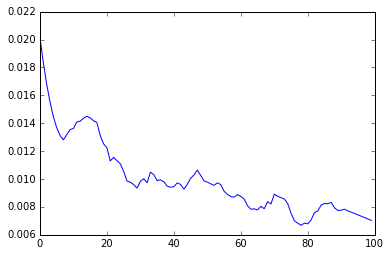

In [3]:
plt.plot(savgol_series('oxford', corpus='gail'))
plt.show()

In [4]:
from joblib import Memory

mem = Memory('cache')

token_counts = mem.cache(Token.token_counts)

tokens = token_counts(20000)

In [76]:
from collections import OrderedDict

data = []
for token in tokens:
    data.append((token, savgol_series(token)[50]))

In [84]:
import pandas as pd

df = pd.DataFrame(data, columns=('token', 'mid'))

df.sort_values('mid', ascending=False, inplace=True)

In [ ]:
def plot_token_series(token, figsize=(5,2)):
    
    gail = Token.token_series(token, corpus='gail')
    chicago = Token.token_series(token, corpus='chicago')
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    plt.title('Offset-binned token counts')
    plt.tight_layout(w_pad=3)

    ax1.set_title('Gail')
    ax1.plot(*zip(*gail.items()))

    ax2.set_title('Chicago')
    ax2.plot(*zip(*chicago.items()))

    print(token)
    plt.show()

cora


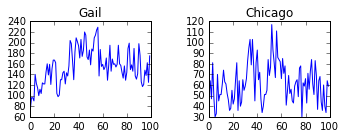

taylor


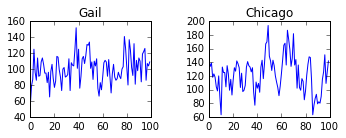

stella


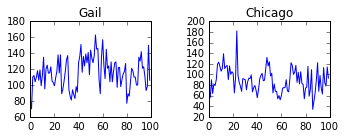

teddy


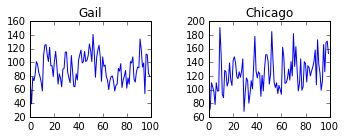

jo


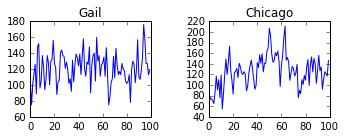

maud


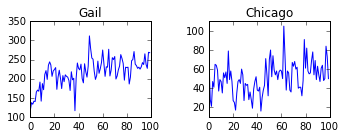

albert


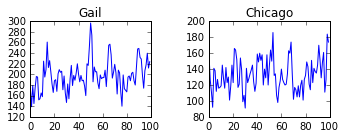

barry


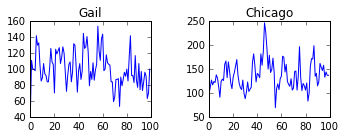

stuart


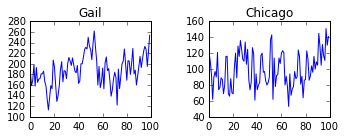

patrick


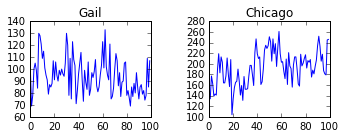

peggy


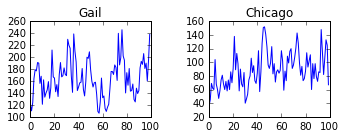

suspicions


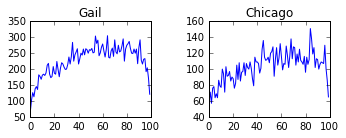

uv


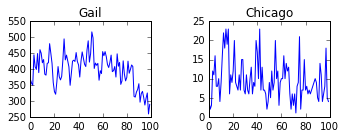

bacon


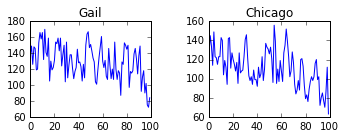

walker


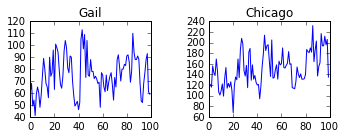

dat


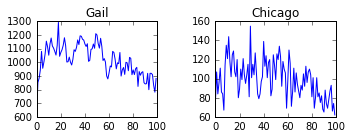

si


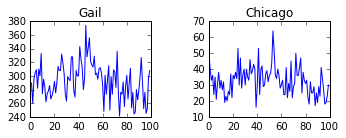

harris


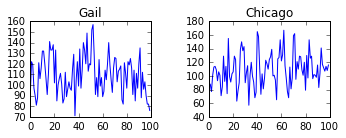

gerald


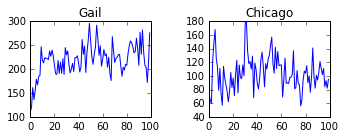

victor


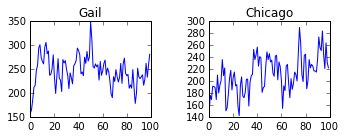

nathan


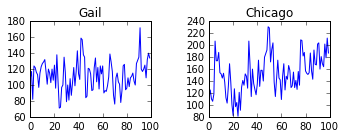

lance


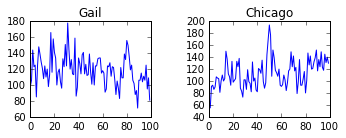

marshall


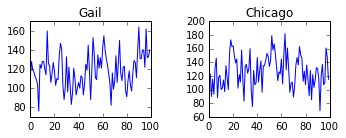

sez


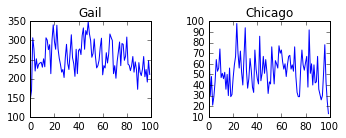

diana


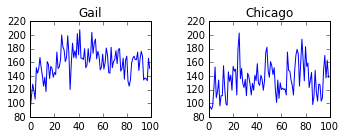

gertrude


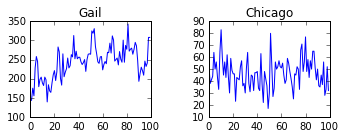

pope


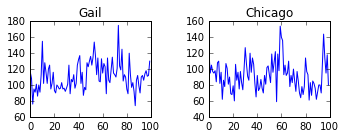

gregory


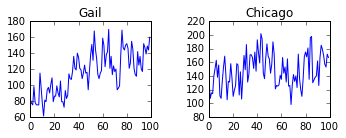

attentions


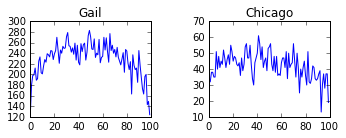

apologize


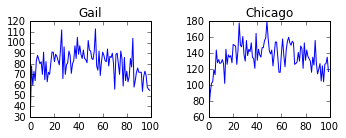

betray


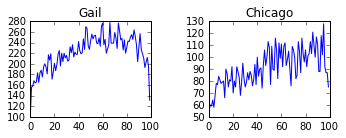

jealousy


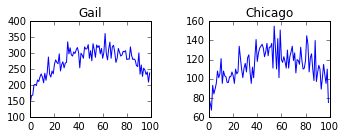

perry


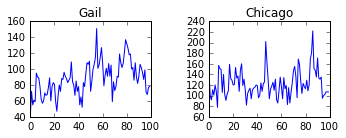

thieves


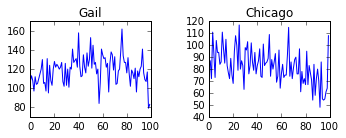

tony


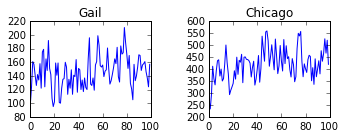

vincent


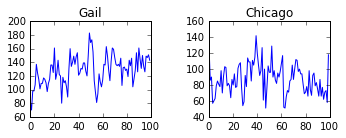

dave


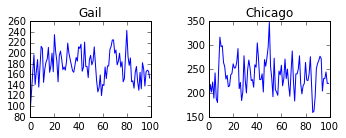

isabel


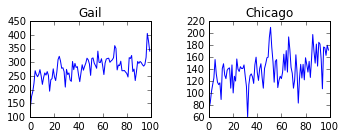

lou


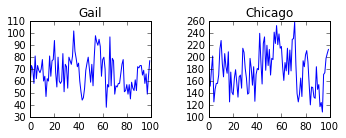

nan


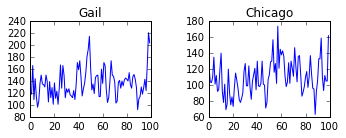

del


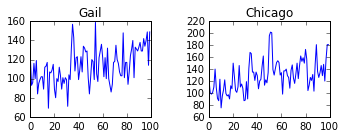

matt


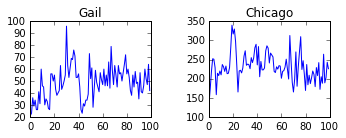

jeff


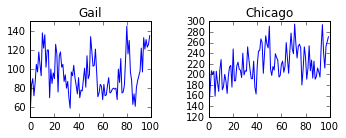

roland


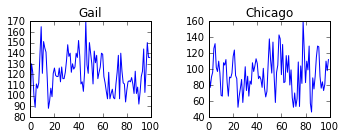

idiot


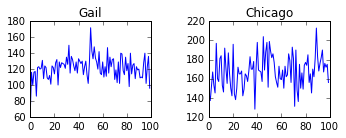

schooner


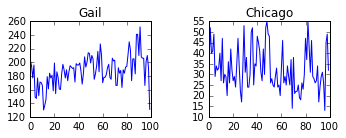

judges


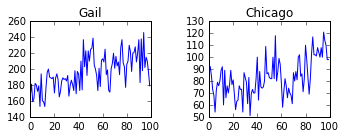

te


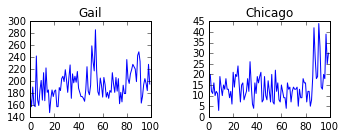

picnic


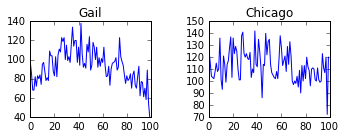

ob


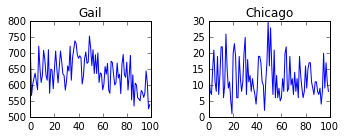

felix


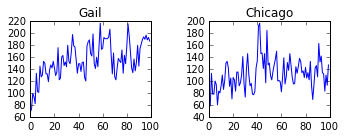

morgan


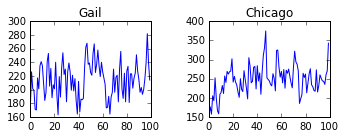

dey


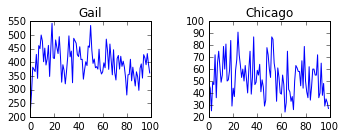

pin


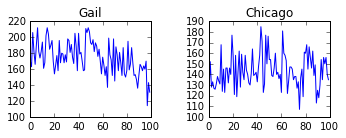

parson


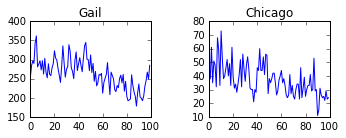

spy


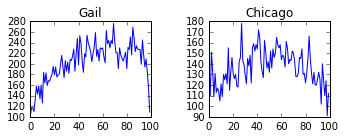

sol


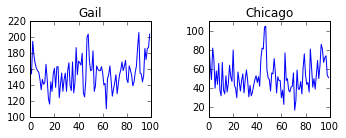

duck


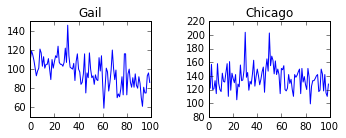

raymond


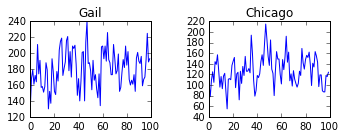

eugene


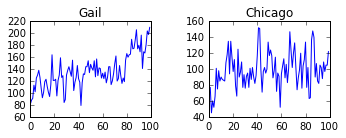

lucy


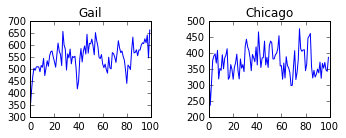

dem


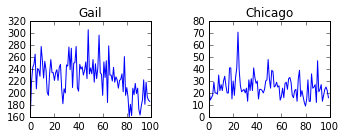

elsie


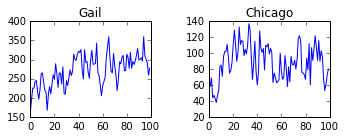

ankle


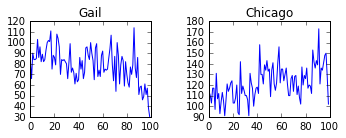

wolf


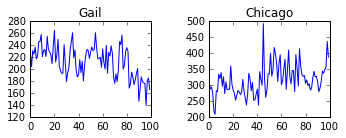

madam


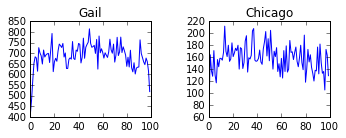

jonathan


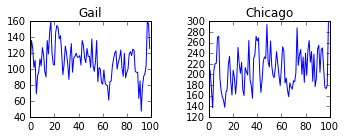

inspector


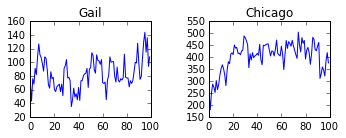

eva


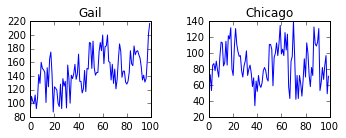

barney


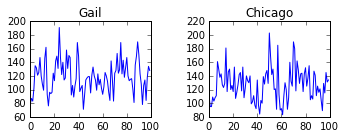

overheard


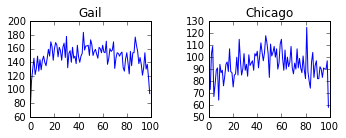

uh


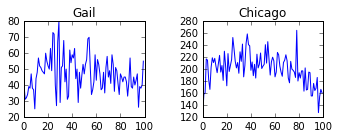

privacy


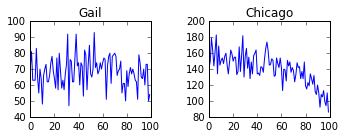

medicine


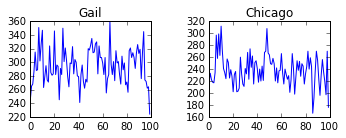

thompson


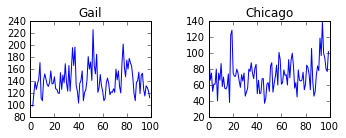

wages


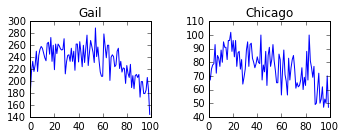

disturbing


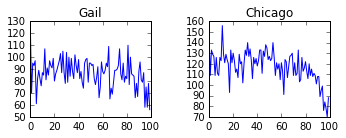

mammy


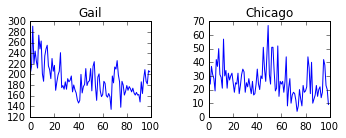

tips


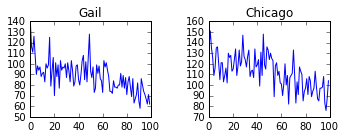

baron


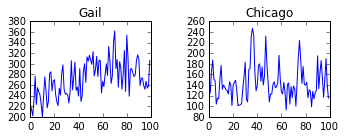

julian


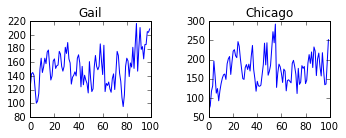

clue


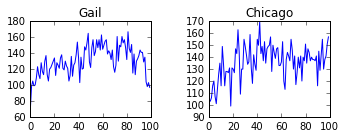

mule


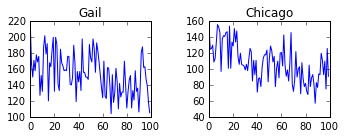

doris


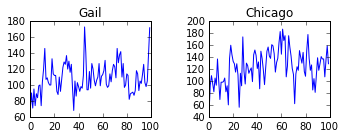

abe


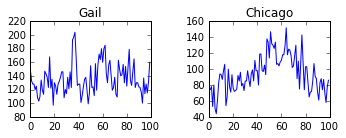

lend


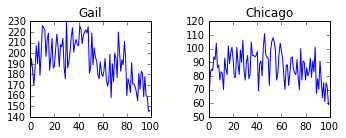

captive


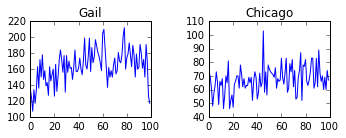

ruby


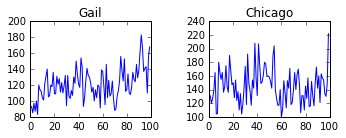

knight


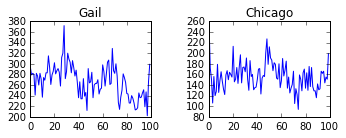

wine


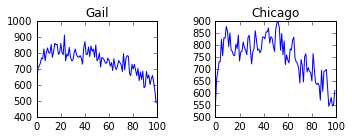

cynthia


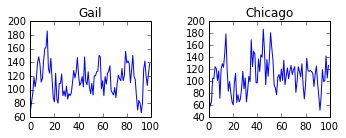

leonard


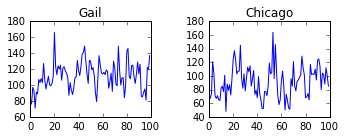

clark


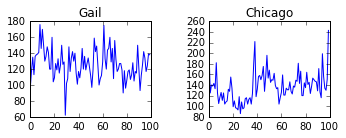

meantime


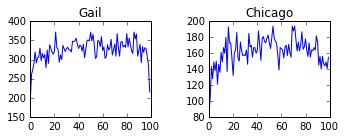

tribe


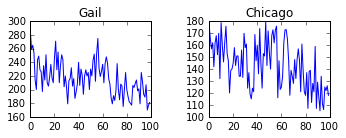

maam


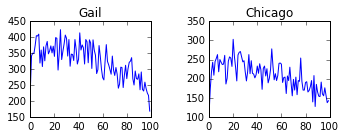

inquire


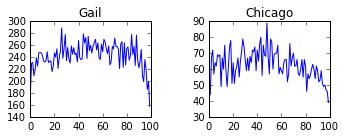

mustnt


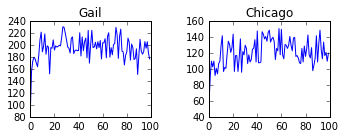

friday


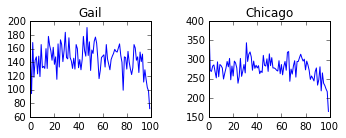

poem


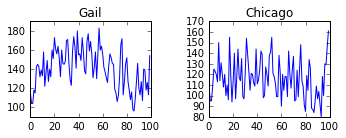

discussing


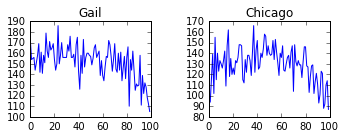

doin


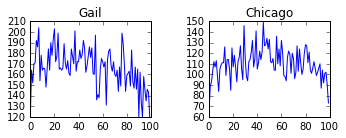

claire


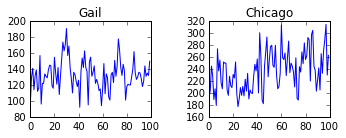

karen


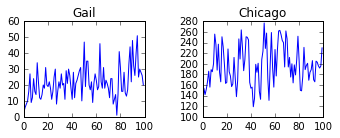

angela


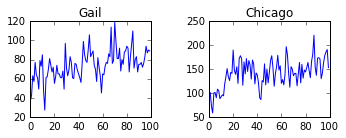

constance


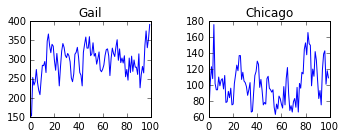

el


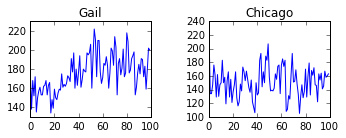

deny


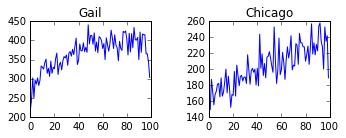

code


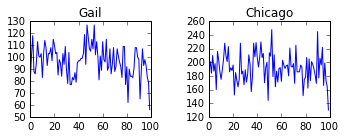

likes


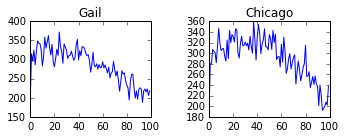

frankly


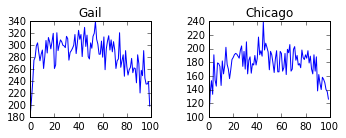

jesse


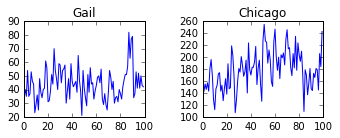

mat


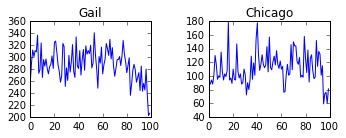

suspect


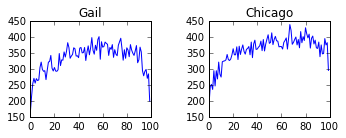

admire


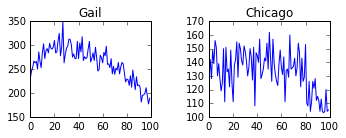

noth


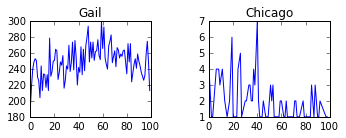

ford


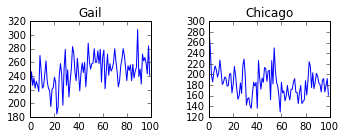

session


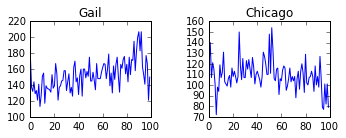

rogers


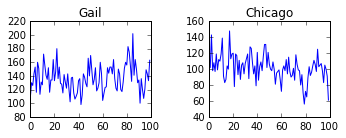

marian


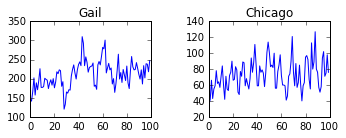

goods


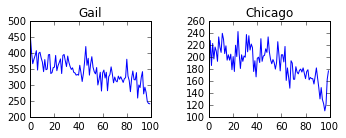

couch


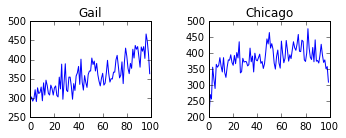

bucket


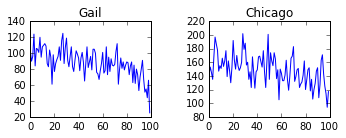

constable


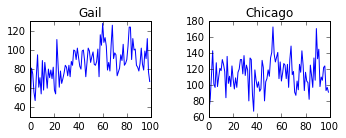

discussion


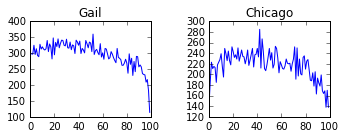

suspicion


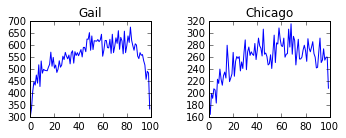

challenge


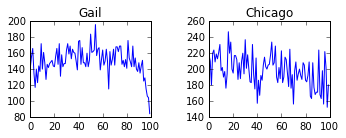

headache


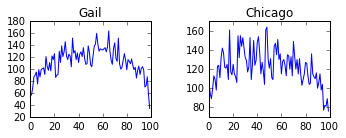

pregnant


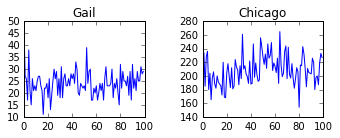

ef


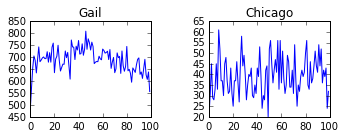

beatrice


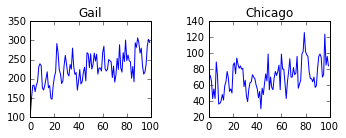

positions


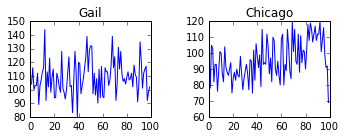

apology


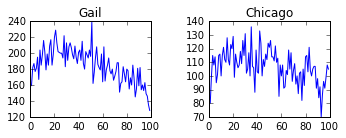

blankets


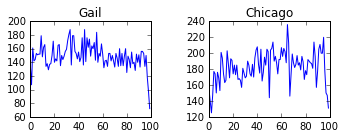

maria


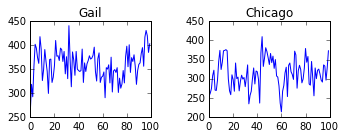

mouse


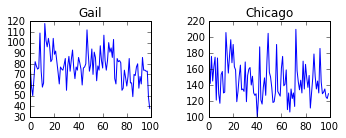

selves


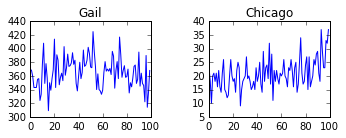

warn


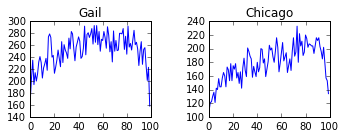

denly


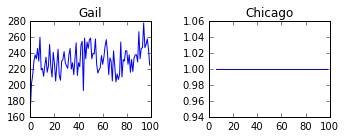

gal


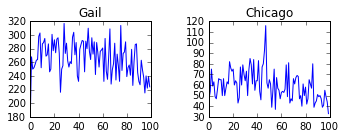

neednt


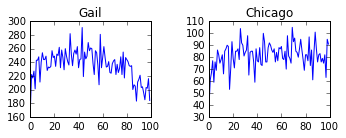

hips


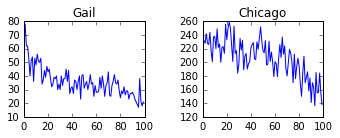

christmas


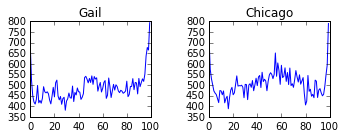

entertainment


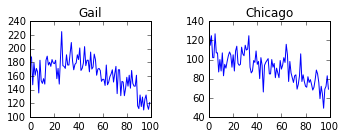

ridiculous


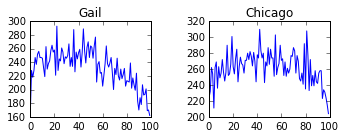

scheme


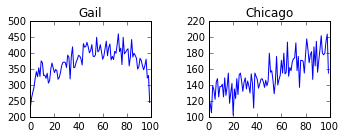

behavior


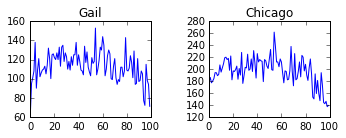

awfully


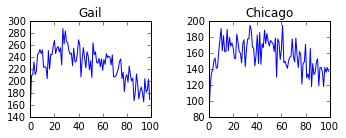

paul


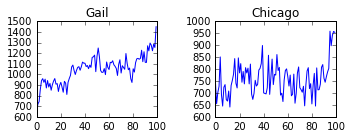

interruption


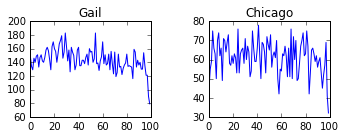

betty


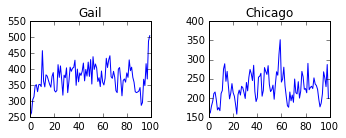

belly


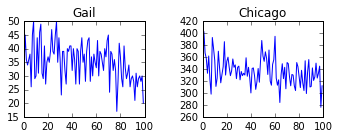

fuck


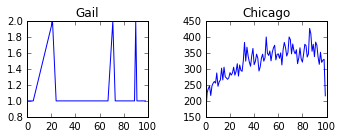

conference


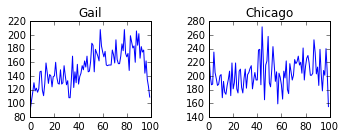

carol


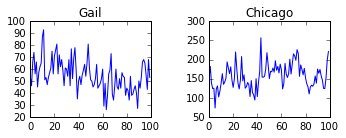

highness


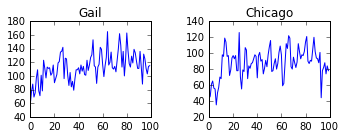

punch


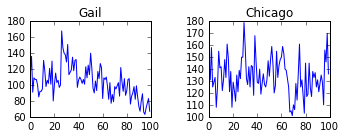

conduct


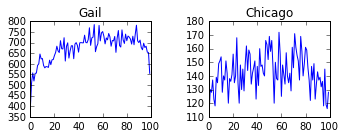

hostess


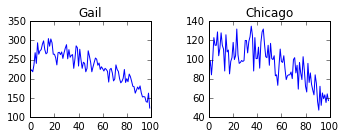

treat


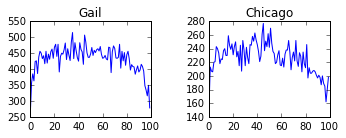

positive


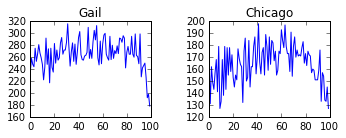

thereby


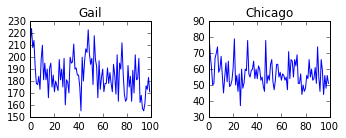

ole


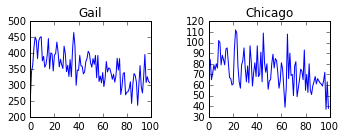

prices


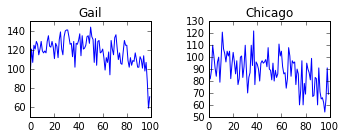

boot


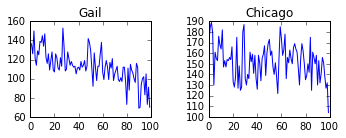

studio


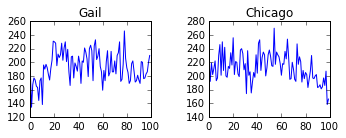

ruth


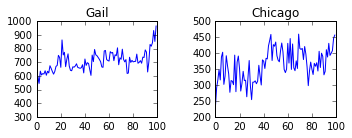

wednesday


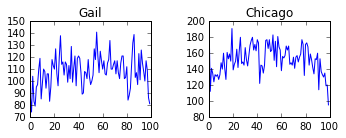

promptly


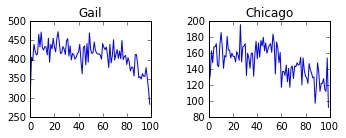

murray


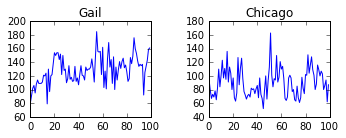

complaint


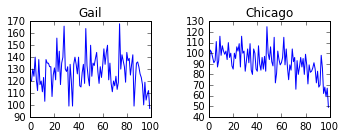

dar


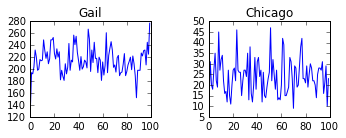

quarrel


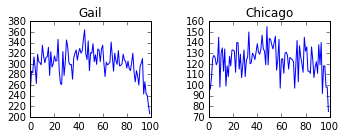

coolly


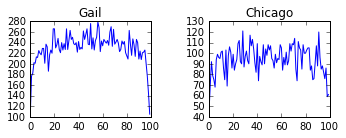

edith


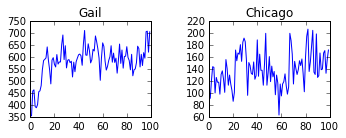

insist


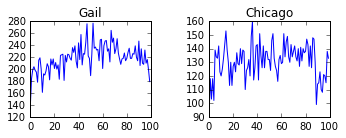

closet


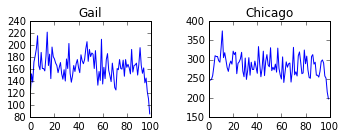

obviously


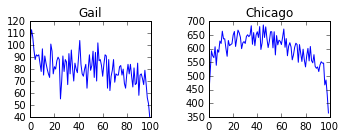

wilson


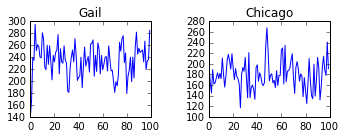

swimming


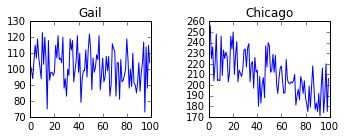

bout


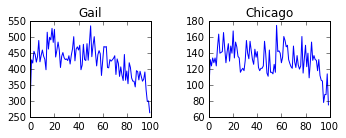

aa


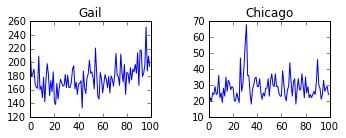

israel


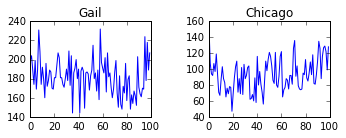

worried


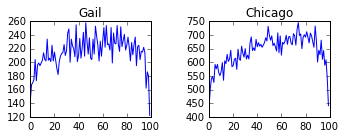

joan


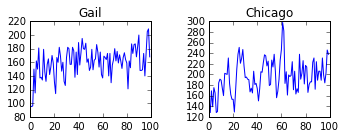

opportunities


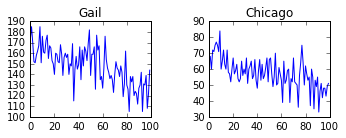

refuse


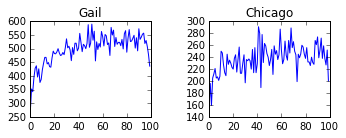

riders


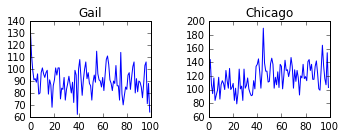

gin


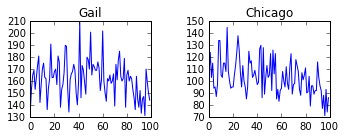

herr


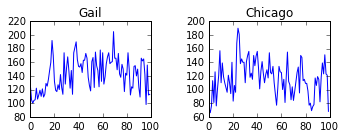

dislike


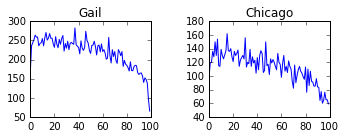

conversation


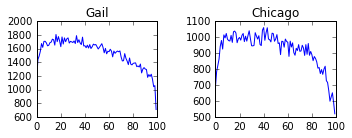

natives


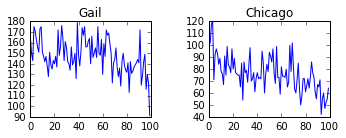

cents


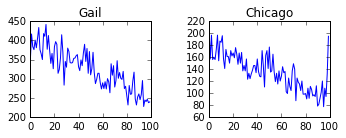

carrie


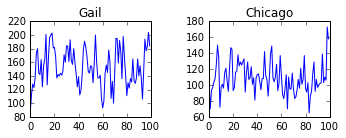

jes


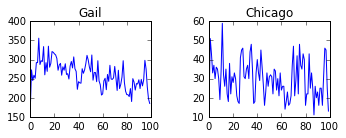

mildly


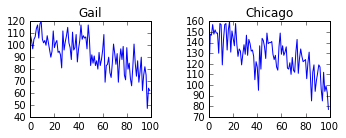

mayor


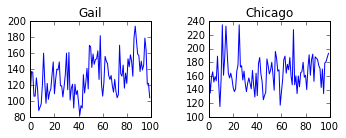

lunch


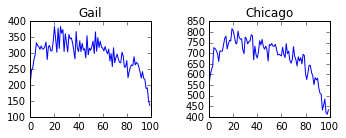

humiliation


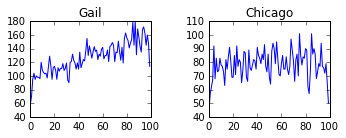

In [90]:
for i, (token, mid) in df.head(200).iterrows():
    plot_token_series(token)

In [88]:
def plot_token_series(token, figsize=(5,2)):
    
    gail = Token.token_series(token, corpus='gail')
    chicago = Token.token_series(token, corpus='chicago')
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    plt.title('Offset-binned token counts')
    plt.tight_layout(w_pad=3)

    ax1.set_title('Gail')
    ax1.plot(*zip(*gail.items()))

    ax2.set_title('Chicago')
    ax2.plot(*zip(*chicago.items()))

    print(token)
    plt.show()

ford


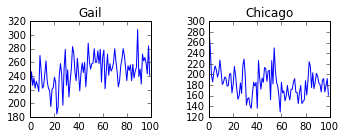

In [89]:
plot_token_series('ford')